In [17]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import ConnectionPatch


# Let's check the data
print(f"Data shape: {df.shape}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Vehicle types: {df['Vehicle_Type'].unique()}")
print(f"Recession periods: {df['Recession'].value_counts()}")

Data shape: (528, 16)
Date range: 1/31/1980 to 9/30/2023
Vehicle types: ['Supperminicar' 'Mediumfamilycar' 'Smallfamiliycar' 'Sports'
 'Executivecar']
Recession periods: Recession
0    415
1    113
Name: count, dtype: int64


In [18]:
path="/content/drive/MyDrive/Dataset/historical_automobile_sales.csv"
df=pd.read_csv(path)
df.head(5)

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


## **2. Stacked Histogram for Vehicle Type Sales**

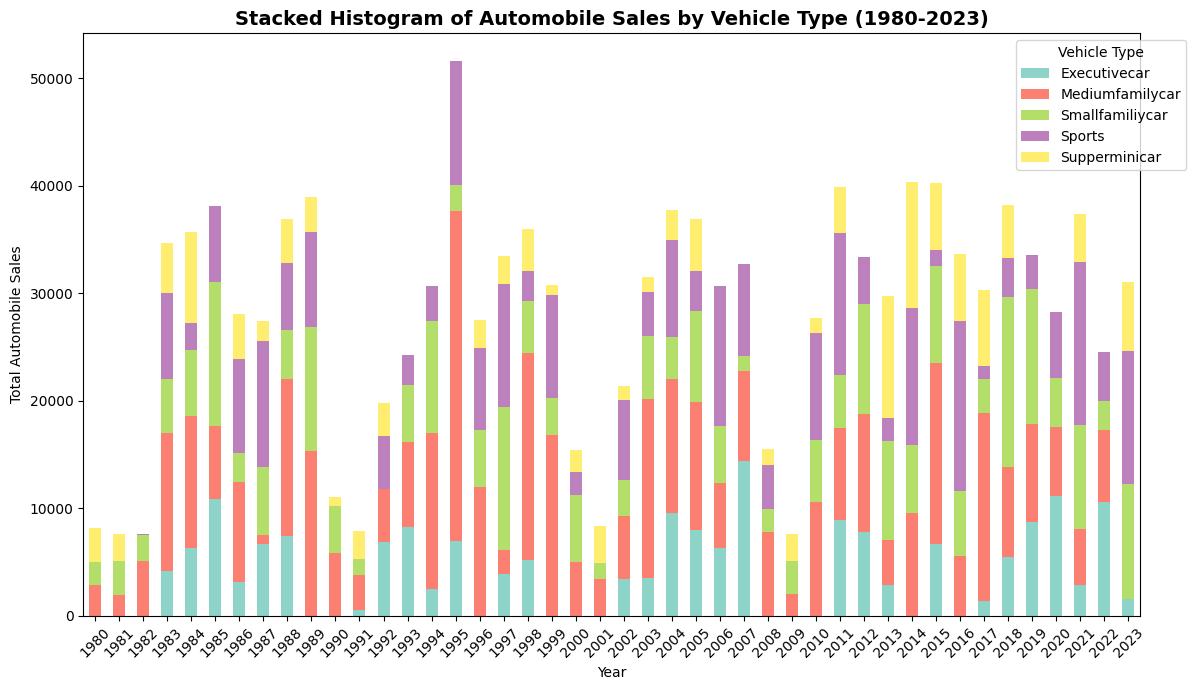

In [19]:
# Stacked histogram for Vehicle Types
plt.figure(figsize=(12, 7))
vehicle_sales = df.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().unstack()
vehicle_sales.plot(kind='bar', stacked=True, colormap='Set3', ax=plt.gca())
plt.title('Stacked Histogram of Automobile Sales by Vehicle Type (1980-2023)', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Automobile Sales')
plt.xticks(rotation=45)
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# **3. Distribution Plot for Price by City**

/tmp/ipython-input-4172572371.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='City')


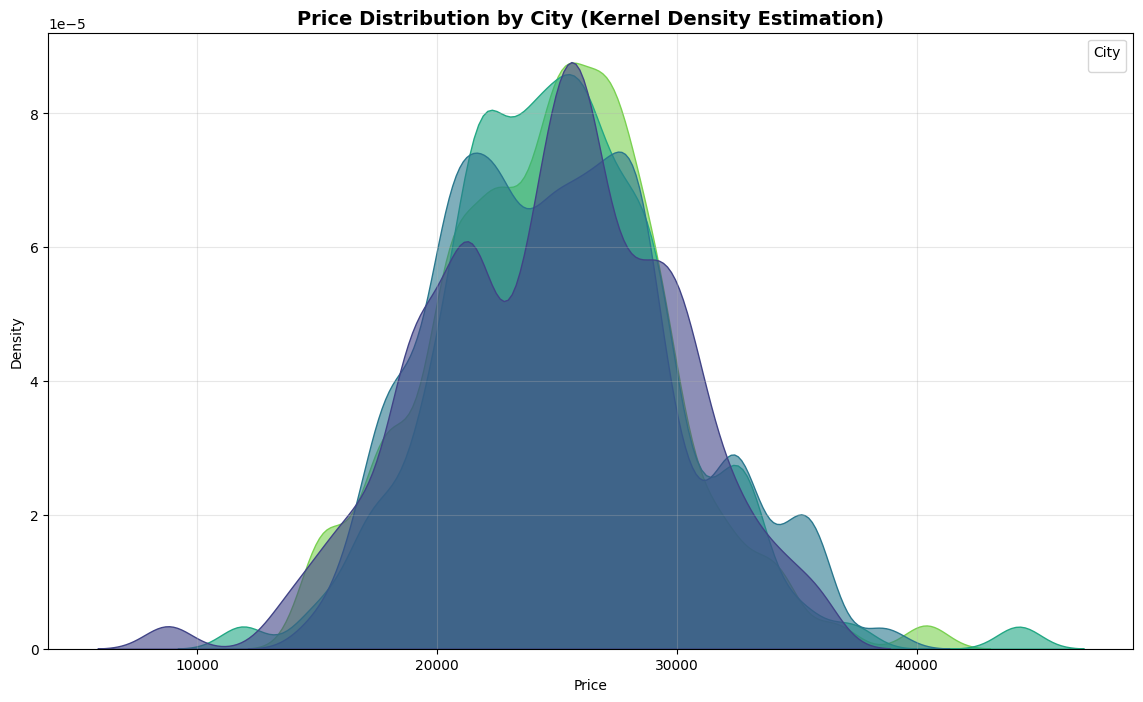

In [20]:
# Filter data for readability
plt.figure(figsize=(14, 8))
cities = ['New York', 'California', 'Illinois', 'Georgia']
filtered_df = df[df['City'].isin(cities)]

# KDE plot for price distribution by city
sns.kdeplot(data=filtered_df, x='Price', hue='City', fill=True, alpha=0.6, palette='viridis', common_norm=False, bw_adjust=0.5)
plt.title('Price Distribution by City (Kernel Density Estimation)', fontsize=14, fontweight='bold')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend(title='City')
plt.grid(True, alpha=0.3)
plt.show()

# **4. Relation Plot: GDP Change with Recession Effect**

/tmp/ipython-input-217301975.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=yearly_data, x='Year', y='GDP', estimator=np.mean,


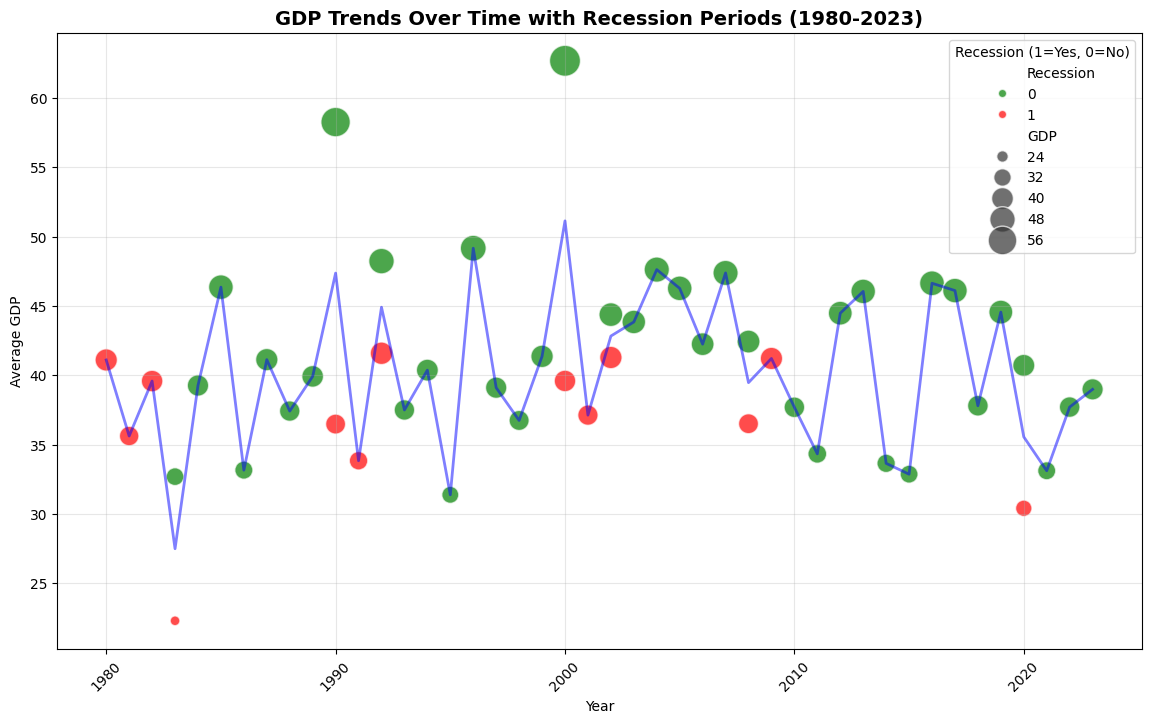

In [21]:
# Aggregate data by year
yearly_data = df.groupby(['Year', 'Recession']).agg({
    'GDP': 'mean',
    'Growth_Rate': 'mean'
}).reset_index()

plt.figure(figsize=(14, 8))

# Scatter plot with recession indicator
scatter = sns.scatterplot(data=yearly_data, x='Year', y='GDP',
                          hue='Recession', palette={0: 'green', 1: 'red'},
                          size='GDP', sizes=(50, 500), alpha=0.7)

# Add trend line
sns.lineplot(data=yearly_data, x='Year', y='GDP', estimator=np.mean,
             ci=None, color='blue', linewidth=2, alpha=0.5)

plt.title('GDP Trends Over Time with Recession Periods (1980-2023)',
          fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Average GDP')
plt.legend(title='Recession (1=Yes, 0=No)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

# **5. Joint Plot for Price, Advertising, and Sales**

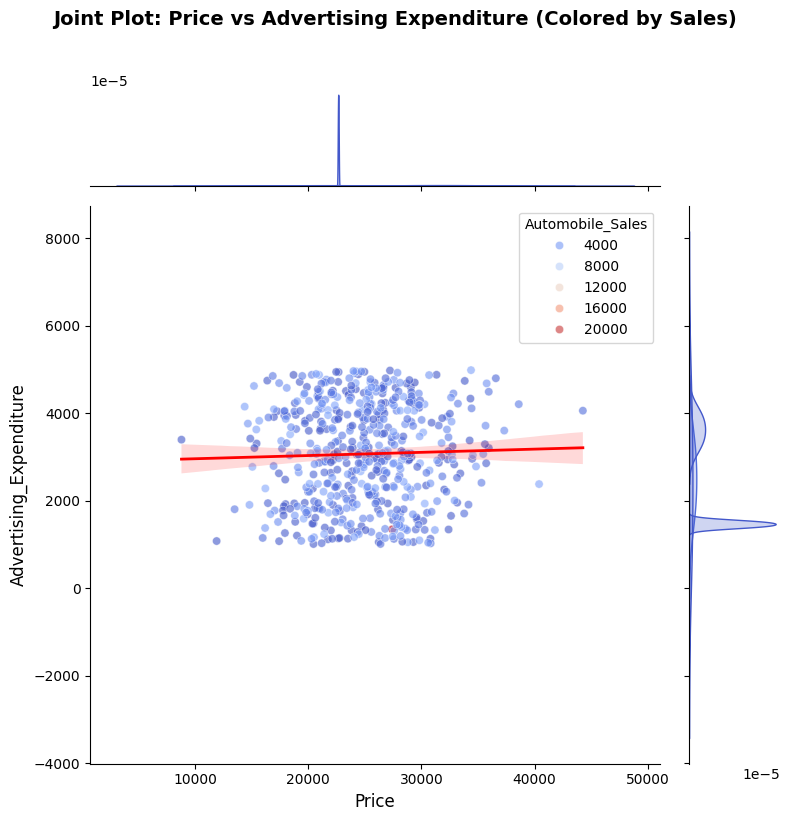

In [22]:
# Create joint plot with regression
joint_plot = sns.jointplot(data=df, x='Price', y='Advertising_Expenditure',
                          hue='Automobile_Sales', palette='coolwarm',
                          kind='scatter', height=8, alpha=0.6,
                          marginal_kws=dict(fill=True))

joint_plot.ax_joint.set_xlabel('Price', fontsize=12)
joint_plot.ax_joint.set_ylabel('Advertising Expenditure', fontsize=12)

# Add regression line
sns.regplot(data=df, x='Price', y='Advertising_Expenditure',
            scatter=False, ax=joint_plot.ax_joint, color='red',
            line_kws={'linewidth': 2})

plt.suptitle('Joint Plot: Price vs Advertising Expenditure (Colored by Sales)',
             y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# **6. Heatmap for Economic Indicators Correlation**

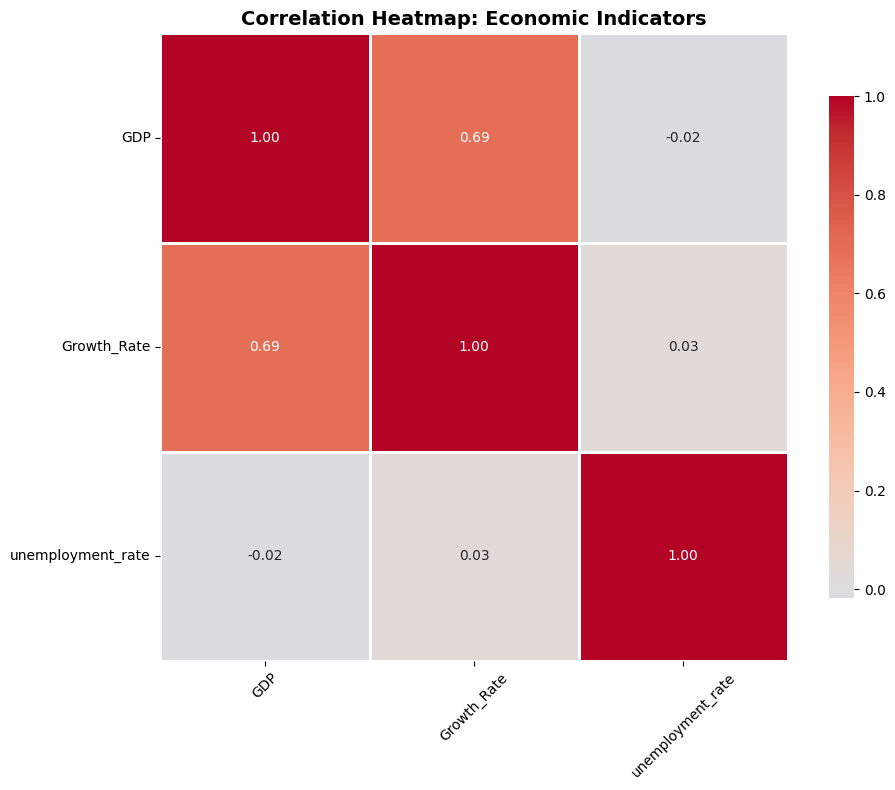

In [23]:
# Select economic indicators
economic_data = df[['GDP', 'Growth_Rate', 'unemployment_rate']].corr()

plt.figure(figsize=(10, 8))

# Create heatmap with annotations
heatmap = sns.heatmap(economic_data, annot=True, fmt='.2f',
                      cmap='coolwarm', center=0,
                      square=True, linewidths=1,
                      cbar_kws={"shrink": 0.8})

plt.title('Correlation Heatmap: Economic Indicators',
          fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# **7. Swarm Plot for Monthly Sales by Vehicle Type**

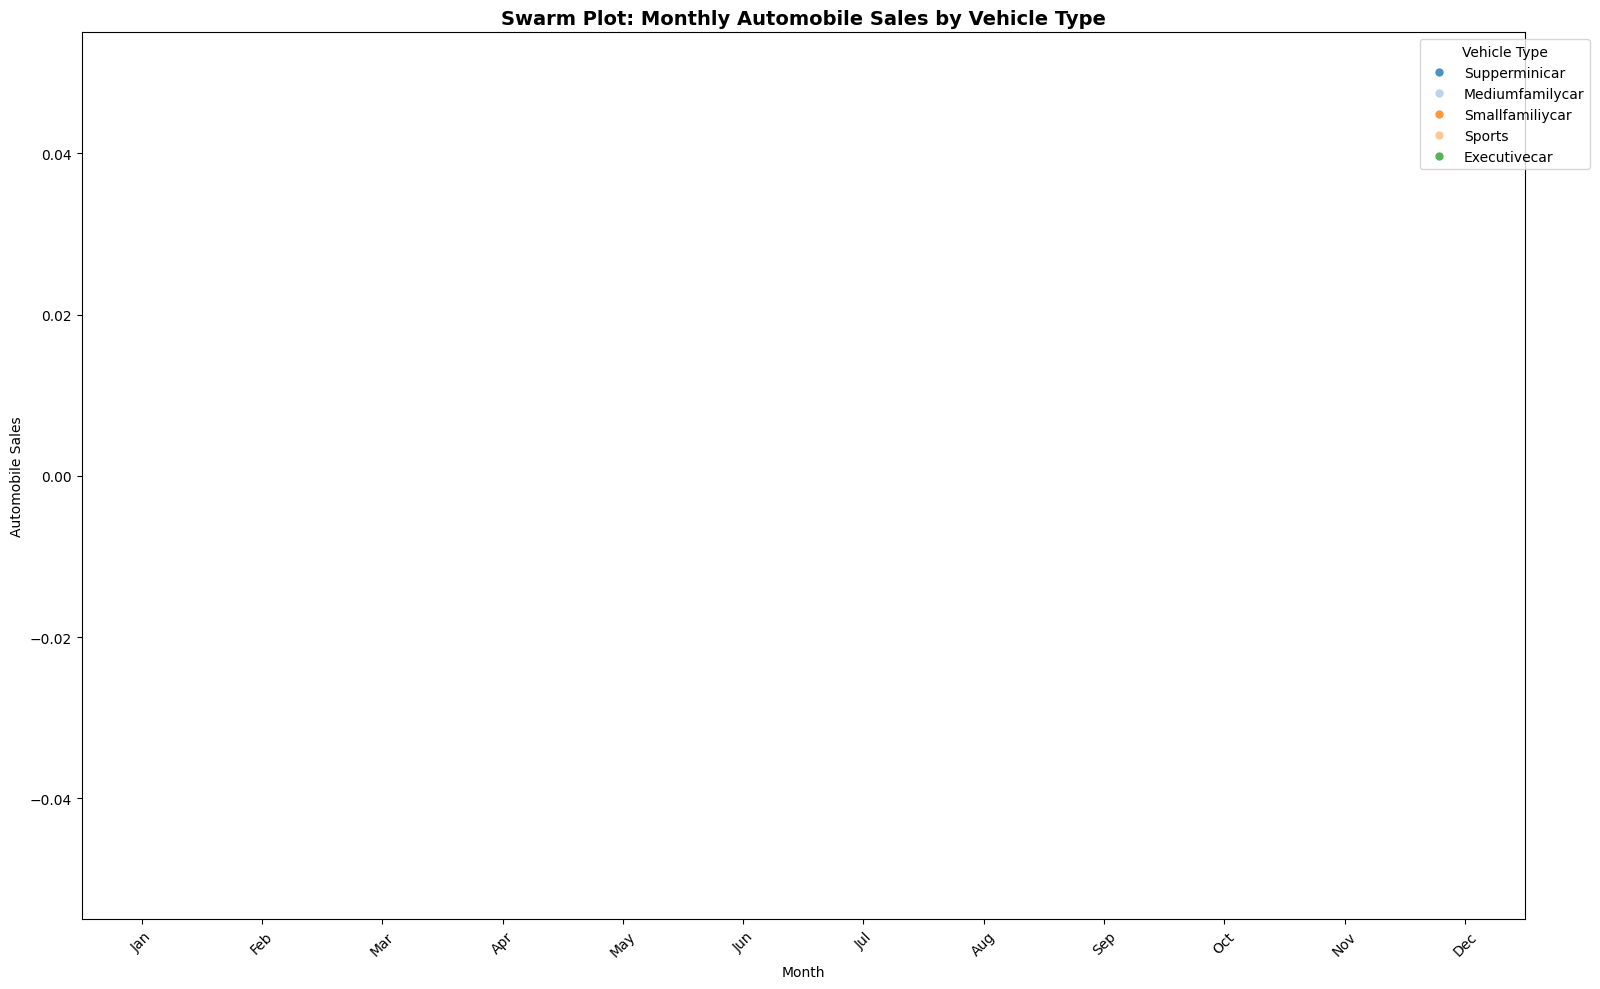

In [24]:
plt.figure(figsize=(16, 10))

# Prepare month names
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month_Name'] = pd.Categorical(df['Month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}), categories=month_order, ordered=True)

# Swarm plot
swarm = sns.swarmplot(data=df, x='Month_Name', y='Automobile_Sales',
                      hue='Vehicle_Type', dodge=True,
                      palette='tab20', size=6, alpha=0.8)

plt.title('Swarm Plot: Monthly Automobile Sales by Vehicle Type',
          fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **8. Violin Plot: Consumer Confidence by Year**

/tmp/ipython-input-1640126071.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(data=filtered_df, x='Year', y='Consumer_Confidence',


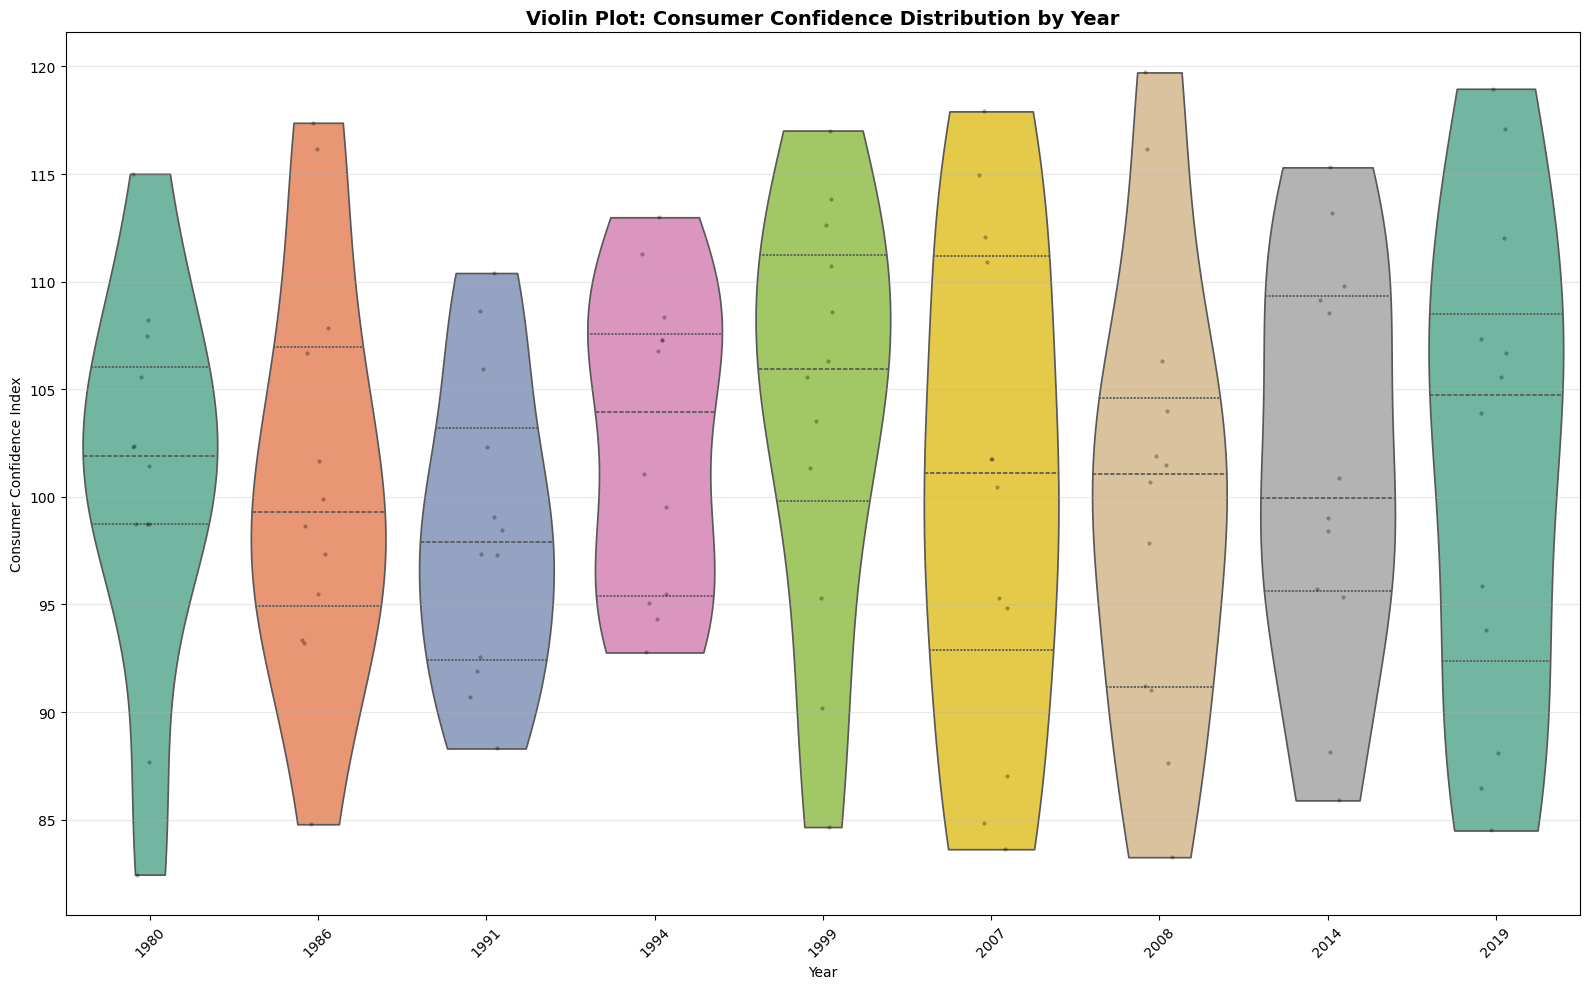

In [25]:
plt.figure(figsize=(16, 10))

# Sample years for better readability (every 5 years)
sample_years = df['Year'].unique()[::5]
filtered_df = df[df['Year'].isin(sample_years)]

# Violin plot
violin = sns.violinplot(data=filtered_df, x='Year', y='Consumer_Confidence',
                        palette='Set2', inner='quartile', cut=0)

# Add stripplot for individual points
sns.stripplot(data=filtered_df, x='Year', y='Consumer_Confidence',
              color='black', size=3, alpha=0.3, jitter=True)

plt.title('Violin Plot: Consumer Confidence Distribution by Year',
          fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Consumer Confidence Index')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# **9. Facet Grid: Advertising Expenditure by Competition**

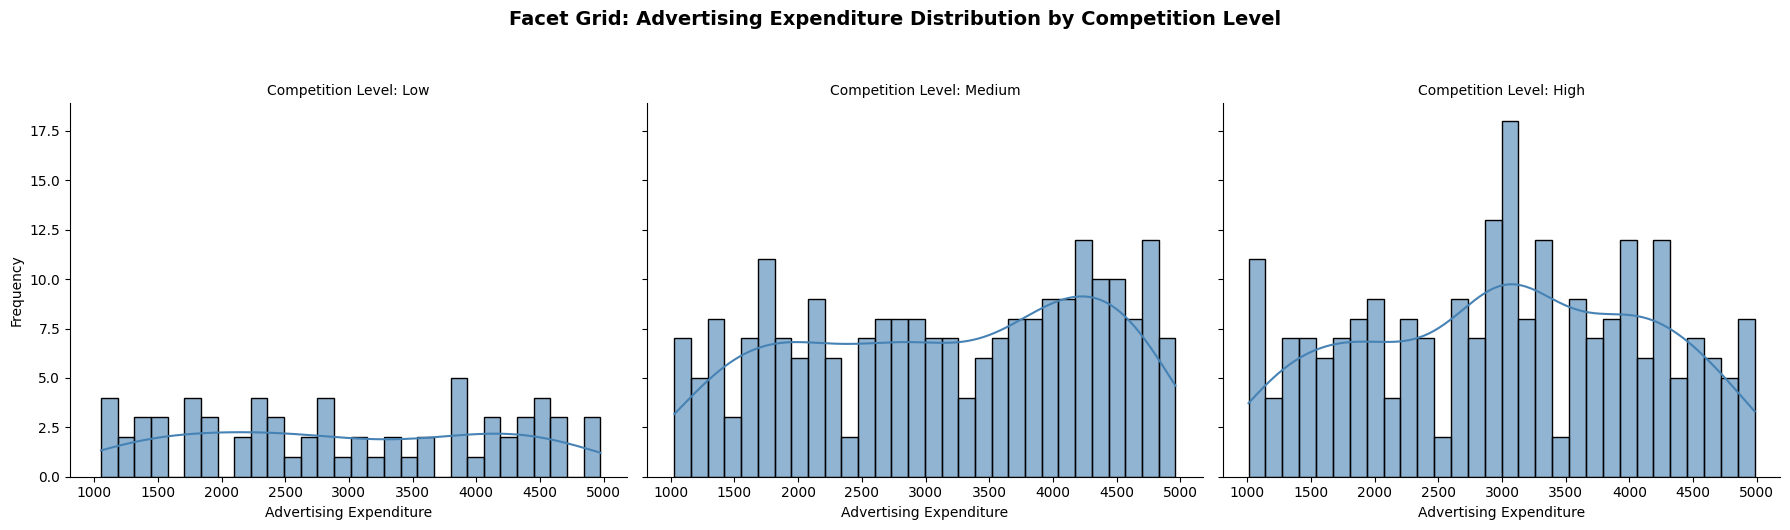

In [26]:
# Create bins for competition levels
df['Competition_Level'] = pd.cut(df['Competition'],
                                 bins=[0, 3, 6, 10],
                                 labels=['Low', 'Medium', 'High'])

# Facet grid
g = sns.FacetGrid(df, col='Competition_Level', col_wrap=3,
                  height=5, aspect=1.2, palette='Set2')

# Map histogram to each facet
g.map(sns.histplot, 'Advertising_Expenditure', bins=30,
      kde=True, alpha=0.6, color='steelblue')

# Add titles and labels
g.set_titles('Competition Level: {col_name}')
g.set_axis_labels('Advertising Expenditure', 'Frequency')

# Add overall title
plt.suptitle('Facet Grid: Advertising Expenditure Distribution by Competition Level',
             y=1.05, fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()